Welcome to the final assignment for this week! In this assignment you will learn to implement and use gradient checking.

You are part of a team working to make mobile payments available globally, and are asked to build a deep learning model to detect fraud--whenever someone makes a payment, you want to see if the payment might be fraudulent, such as if the user's account has been taken over by a hacker.

But backpropagation is quite challenging to implement, and sometimes has bugs. Because this is a mission-critical application, your company's CEO wants to be really certain that your implementation of backpropagation is correct. Your CEO says, "Give me a proof that your backpropagation is actually working!" To give this reassurance, you are going to use "gradient checking".

Let's do it!

In [1]:
# Packages
import numpy as np
from testCases import *
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

1) How does gradient checking work?
Backpropagation computes the gradients $\frac{\partial J}{\partial \theta}$, where $\theta$ denotes the parameters of the model. $J$ is computed using forward propagation and your loss function.

Because forward propagation is relatively easy to implement, you're confident you got that right, and so you're almost 100% sure that you're computing the cost $J$ correctly. Thus, you can use your code for computing $J$ to verify the code for computing $\frac{\partial J}{\partial \theta}$.

Let's look back at the definition of a derivative (or gradient): $$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$

If you're not familiar with the "$\displaystyle \lim_{\varepsilon \to 0}$" notation, it's just a way of saying "when $\varepsilon$ is really really small."

We know the following:

$\frac{\partial J}{\partial \theta}$ is what you want to make sure you're computing correctly.
You can compute $J(\theta + \varepsilon)$ and $J(\theta - \varepsilon)$ (in the case that $\theta$ is a real number), since you're confident your implementation for $J$ is correct.
Lets use equation (1) and a small value for $\varepsilon$ to convince your CEO that your code for computing  $\frac{\partial J}{\partial \theta}$ is correct!

2) 1-dimensional gradient checking
Consider a 1D linear function $J(\theta) = \theta x$. The model contains only a single real-valued parameter $\theta$, and takes $x$ as input.

You will implement code to compute $J(.)$ and its derivative $\frac{\partial J}{\partial \theta}$. You will then use gradient checking to make sure your derivative computation for $J$ is correct.
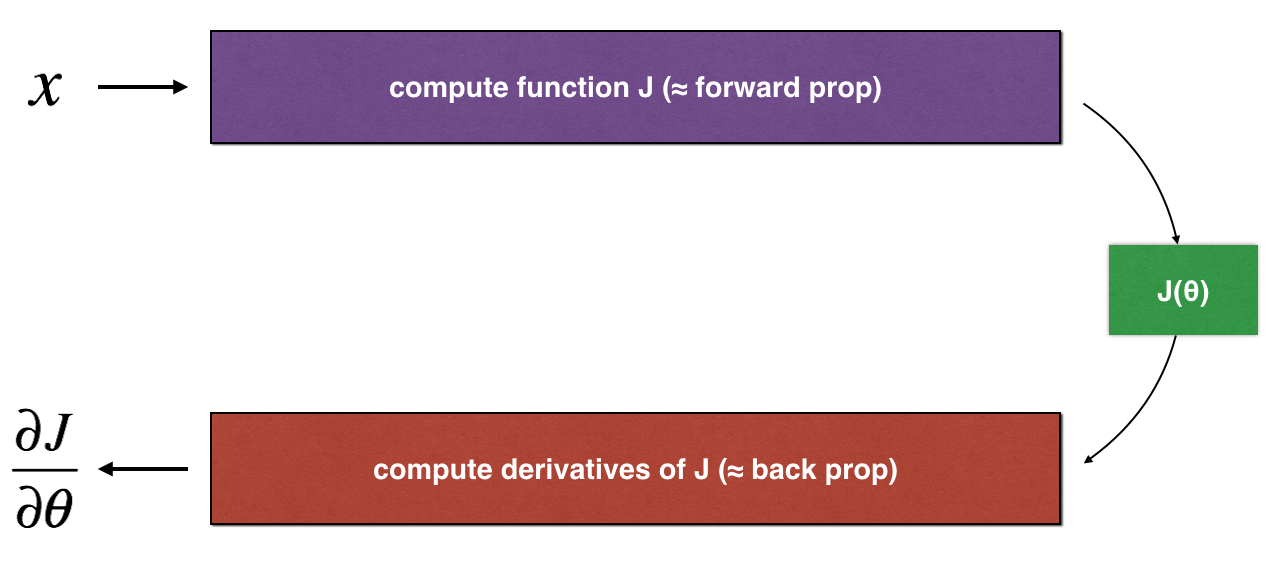

The diagram above shows the key computation steps: First start with $x$, then evaluate the function $J(x)$ ("forward propagation"). Then compute the derivative $\frac{\partial J}{\partial \theta}$ ("backward propagation").

Exercise: implement "forward propagation" and "backward propagation" for this simple function. I.e., compute both $J(.)$ ("forward propagation") and its derivative with respect to $\theta$ ("backward propagation"), in two separate functions.

In [2]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(x, theta):
    """
    Implement the linear forward propagation (compute J) presented in Figure 1 (J(theta) = theta * x)
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    J -- the value of function J, computed using the formula J(theta) = theta * x
    """
    
    ### START CODE HERE ### (approx. 1 line)
    J = np.multiply(x,theta)
    ### END CODE HERE ###
    
    return J

In [3]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


J = 8
Expected Output:

<table style=>

** J ** 8 </table>
Exercise: Now, implement the backward propagation step (derivative computation) of Figure 1. That is, compute the derivative of $J(\theta) = \theta x$ with respect to $\theta$. To save you from doing the calculus, you should get $dtheta = \frac { \partial J }{ \partial \theta} = x$.

In [4]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(x, theta):
    """
    Computes the derivative of J with respect to theta (see Figure 1).
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    dtheta -- the gradient of the cost with respect to theta
    """
    
    ### START CODE HERE ### (approx. 1 line)
    dtheta = x
    ### END CODE HERE ###
    
    return dtheta

In [5]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

dtheta = 2


dtheta = 2
Expected Output:

** dtheta **	2

Exercise: To show that the backward_propagation() function is correctly computing the gradient $\frac{\partial J}{\partial \theta}$, let's implement gradient checking.

Instructions:

First compute "gradapprox" using the formula above (1) and a small value of $\varepsilon$. Here are the Steps to follow:

$\theta^{+} = \theta + \varepsilon$

$\theta^{-} = \theta - \varepsilon$

$J^{+} = J(\theta^{+})$

$J^{-} = J(\theta^{-})$

$gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$

Then compute the gradient using backward propagation, and store the result in a variable "grad"
Finally, compute the relative difference between "gradapprox" and the "grad" using the following formula: $$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} \tag{2}$$ You will need 3 Steps to compute this formula:

1'. compute the numerator using np.linalg.norm(...)

2'. compute the denominator. You will need to call np.linalg.norm(...) twice.

3'. divide them.

If this difference is small (say less than $10^{-7}$), you can be quite confident that you have computed your gradient correctly. Otherwise, there may be a mistake in the gradient computation.

In [16]:
# GRADED FUNCTION: gradient_check

def gradient_check(x, theta, epsilon = 1e-7):
    """
    Implement the backward propagation presented in Figure 1.
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Compute gradapprox using left side of formula (1). epsilon is small enough, you don't need to worry about the limit.
    ### START CODE HERE ### (approx. 5 lines)
    theta_plus = theta + epsilon
    theta_minus = theta - epsilon
    J_plus = forward_propagation(x, theta_plus)
    J_minus = forward_propagation(x, theta_minus)
    gradapprox = (J_plus - J_minus)/(2*epsilon)
    ### END CODE HERE ###
    
    # Check if gradapprox is close enough to the output of backward_propagation()
    ### START CODE HERE ### (approx. 1 line)
    grad = backward_propagation(x, theta)
    ### END CODE HERE ###
        
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm((grad-gradapprox),keepdims=True)
    denominator = np.linalg.norm((grad),keepdims=True) + np.linalg.norm((gradapprox),keepdims=True)
    difference = numerator/denominator
    ### END CODE HERE ###
    
    if difference < 1e-7:
        print ("The gradient is correct!")
    else:
        print ("The gradient is wrong!")
    
    return difference

In [17]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10


The gradient is correct!
difference = 2.91933588329e-10
Expected Output: The gradient is correct!

** difference **	2.9193358103083e-10

Congrats, the difference is smaller than the $10^{-7}$ threshold. So you can have high confidence that you've correctly computed the gradient in backward_propagation().

Now, in the more general case, your cost function $J$ has more than a single 1D input. When you are training a neural network, $\theta$ actually consists of multiple matrices $W^{[l]}$ and biases $b^{[l]}$! It is important to know how to do a gradient check with higher-dimensional inputs. Let's do it!

3) N-dimensional gradient checking
The following figure describes the forward and backward propagation of your fraud detection model.

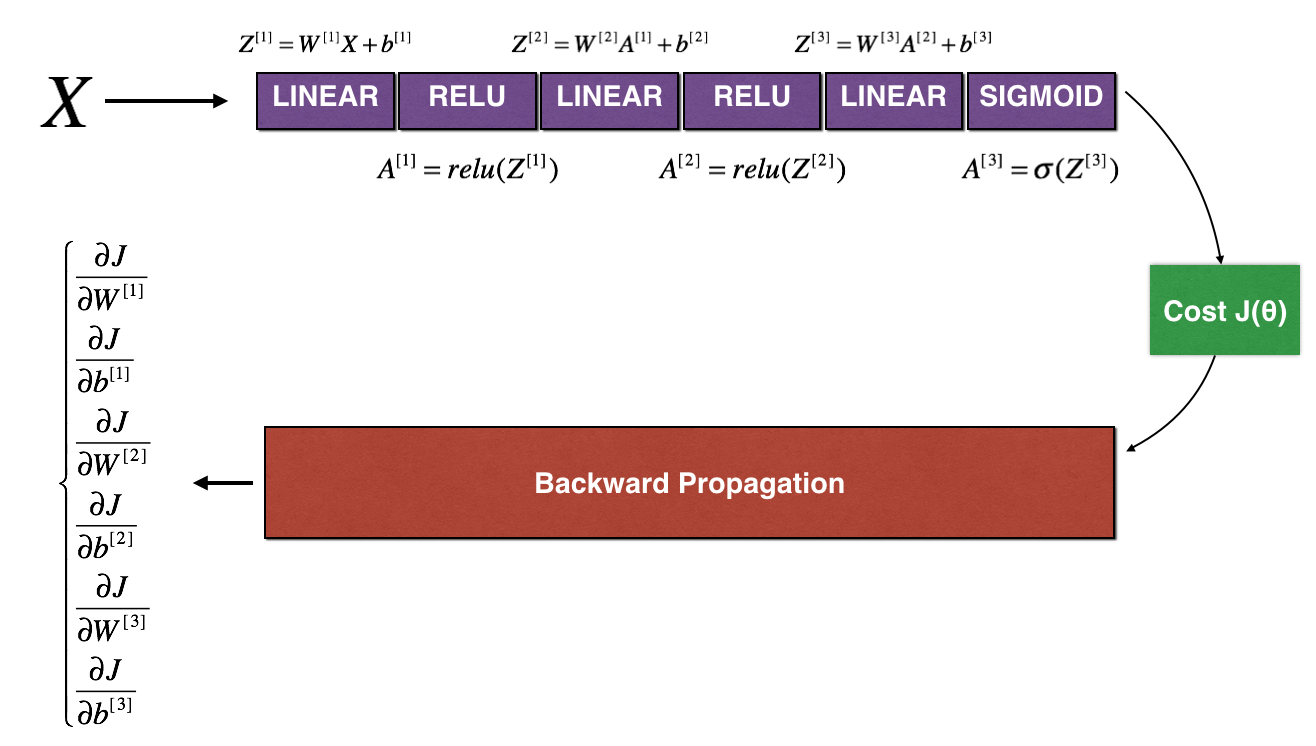

Let's look at your implementations for forward propagation and backward propagation.

In [18]:
def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    """
    
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

Now, run backward propagation.

In [19]:
def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost with respect to each parameter, activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) * 2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 4./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

You obtained some results on the fraud detection test set but you are not 100% sure of your model. Nobody's perfect! Let's implement gradient checking to verify if your gradients are correct.

How does gradient checking work?.

As in 1) and 2), you want to compare "gradapprox" to the gradient computed by backpropagation. The formula is still:

$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$
However, $\theta$ is not a scalar anymore. It is a dictionary called "parameters". We implemented a function "dictionary_to_vector()" for you. It converts the "parameters" dictionary into a vector called "values", obtained by reshaping all parameters (W1, b1, W2, b2, W3, b3) into vectors and concatenating them.

The inverse function is "vector_to_dictionary" which outputs back the "parameters" dictionary.

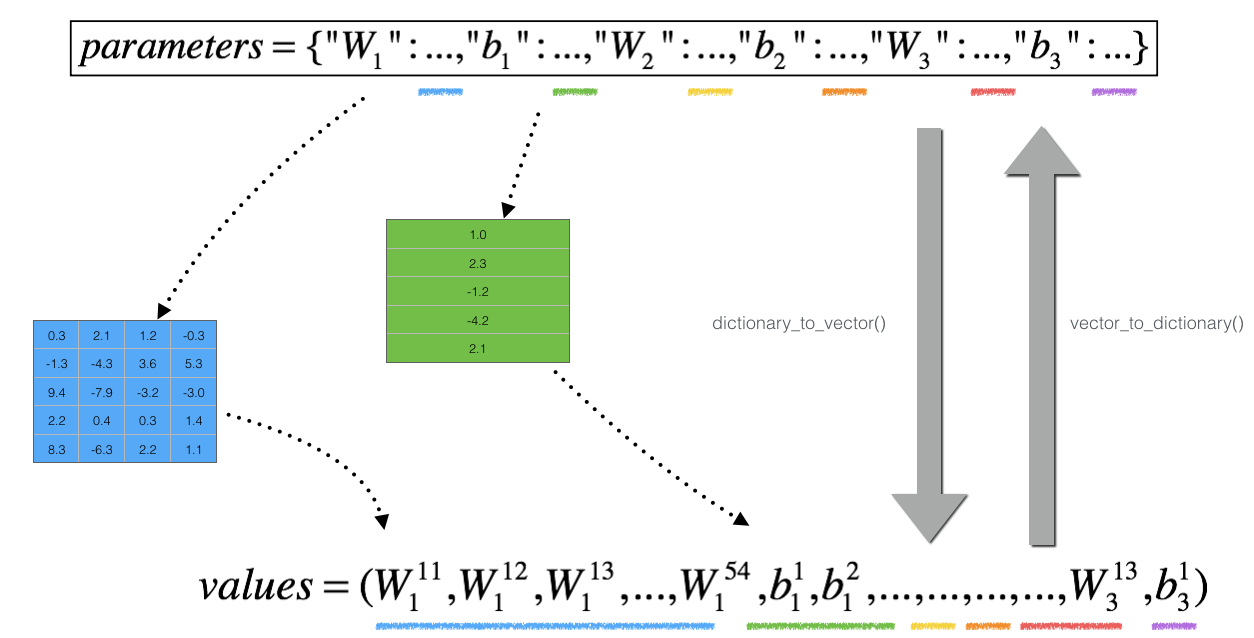

We have also converted the "gradients" dictionary into a vector "grad" using gradients_to_vector(). You don't need to worry about that.

Exercise: Implement gradient_check_n().

Instructions: Here is pseudo-code that will help you implement the gradient check.

For each i in num_parameters:

To compute J_plus[i]:

Set $\theta^{+}$ to np.copy(parameters_values)

Set $\theta^{+}_i$ to $\theta^{+}_i + \varepsilon$

Calculate $J^{+}_i$ using to forward_propagation_n(x, y, vector_to_dictionary($\theta^{+}$ )).

To compute J_minus[i]: do the same thing with $\theta^{-}$

Compute $gradapprox[i] = \frac{J^{+}_i - J^{-}_i}{2 \varepsilon}$

Thus, you get a vector gradapprox, where gradapprox[i] is an approximation of the gradient with respect to parameter_values[i]. You can now compare this gradapprox vector to the gradients vector from backpropagation. Just like for the 1D case (Steps 1', 2', 3'), compute: $$ difference = \frac {\| grad - gradapprox \|_2}{\| grad \|_2 + \| gradapprox \|_2 } \tag{3}$$

In [58]:
# GRADED FUNCTION: gradient_check_n

def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        theta_plus = np.copy(parameters_values)
        theta_plus[i][0] += epsilon
        J_plus[i],_ = forward_propagation_n(X, Y, vector_to_dictionary(theta_plus))
        ### END CODE HERE ###
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        theta_minus = np.copy(parameters_values)
        theta_minus[i][0] -= epsilon
        J_minus[i],_ = forward_propagation_n(X, Y, vector_to_dictionary(theta_minus))
        ### END CODE HERE ###
        
        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox = (J_plus[i] - J_minus[i])/(2*epsilon)
        ### END CODE HERE ###
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm((grad-gradapprox),keepdims=True)
    denominator = np.linalg.norm((grad),keepdims=True) + np.linalg.norm((gradapprox),keepdims=True)
    difference = numerator/denominator
    ### END CODE HERE ###

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [59]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

There is a mistake in the backward propagation! difference = [[0.95510607]]


Expected output:

** There is a mistake in the backward propagation!**	difference = 0.285093156781

It seems that there were errors in the backward_propagation_n code we gave you! Good that you've implemented the gradient check. Go back to backward_propagation and try to find/correct the errors (Hint: check dW2 and db1). Rerun the gradient check when you think you've fixed it. Remember you'll need to re-execute the cell defining backward_propagation_n() if you modify the code.

Can you get gradient check to declare your derivative computation correct? Even though this part of the assignment isn't graded, we strongly urge you to try to find the bug and re-run gradient check until you're convinced backprop is now correctly implemented.

Note

Gradient Checking is slow! Approximating the gradient with $\frac{\partial J}{\partial \theta} \approx  \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon}$ is computationally costly. For this reason, we don't run gradient checking at every iteration during training. Just a few times to check if the gradient is correct.

Gradient Checking, at least as we've presented it, doesn't work with dropout. You would usually run the gradient check algorithm without dropout to make sure your backprop is correct, then add dropout.
Congrats, you can be confident that your deep learning model for fraud detection is working correctly! You can even use this to convince your CEO. :)

Gradient checking verifies closeness between the gradients from backpropagation and the numerical approximation of the gradient (computed using forward propagation).

Gradient checking is slow, so we don't run it in every iteration of training. You would usually run it only to make sure your code is correct, then turn it off and use backprop for the actual learning process.